# 설정
     .join() 함수를 쓰는 이유
     - 파일 경로상의 디렉터리를 구분할때 Windows는 역슬레시(\), Unix, Linux는 슬래시(/)로 구분함.
     이처럼 운영체제의 환경에 따라 구분자가 달라지기 때문에 .join() 함수를 사용해 자동으로 환경에 맞춰 구분자를 생성함.


[os관련 정보](https://dololak.tistory.com/693)
[plot관련 정보](https://kongdols-room.tistory.com/98)

In [40]:
import numpy as np
import os

# 출력값 조정위한 유사난수 초기화
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt

# 기본값 설정
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False  # 그래프에서 마이너스 기호 표시되도록

# 그림 저장할 폴드
PROJECT_ROOT_DIR = "."  # no.1
CHAPTER_ID = "re_chap_02"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)  # no.2
os.makedirs(IMAGES_PATH, exist_ok=True)  # no.5

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout() # no.3
    plt.savefig(path, format=fig_extension, dpi=resolution)


### 체크체크
        - no.1
        -- 절대 경로와 상대경로
        절대경로는 쉽게 말해 전체 경로를 말하는거 같음
        상대경로는 현재 위치를 기준으로한 위치
        상대경로에서 1. '/' 가장 최상의 디렉토리로 이동 2. './' 현재 디렉토리 의미 3. '../' 상위 디렉토리를 의미
        상위상위 디렉토리로 가려면 당연히 ../../ 라고 쓰면됨
        그래서 no.1에서 "."을 쓴게 현재 디렉토리를 표시하기 위한걸로 보임

        - no.2
        -- .join() 함수
        파일 경로상의 디렉터리를 구분할때 Windows는 역슬레시(\), Unix, Linux는 슬래시(/)로 구분함.
        이처럼 운영체제의 환경에 따라 구분자가 달라지기 때문에 .join() 함수를 사용해 자동으로 환경에 맞춰 구분자를 생성함.
        따라서 no.2를 해석해보면 현재디렉토리 -> images -> CHAPTER_ID (content/images/re_chapter_02)

        - no.3
        -- .tight_layout() 함수
        subplot에서 자동으로 레이아웃을 맞춰줌.
        기본값: tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)
        - pad 
        figure과 서브플롯의 모서리 사이 여백 설정
        - h_pad, w_pad
        서로 인접한 서브플롯 사이의 모서리간의 높이 및 넓이 여백 설정
        - rect
        서브플롯을 넣기 위한 사각형 설정. (왼, 바닥쪽, 오, 위쪽)을 입력받음.
        기본값은 (1,0,1,1)

        - no.5
        -- makedirs
        mkdir은 한 폴더만 생성가능하지만 .makedirs는 './a/b/c'처럼 원하는 만큼 디렉터리 생성 가능
        exist_ok=True로 하면 해당 디렉터리가 기존에 존재해도 오류없이 그냥 넘어감




In [25]:
# 디렉토리 경로와 파일명 분리
file_path = "/content/images/re_chapter_02/hey.png"
print(os.path.split(file_path))  # 튜플로 반환

# 상대결로를 절대경로로 바꿀때
print(os.path.abspath('.'))

# 경로에서 파일명 or 디렉터리 경로 구할때  <- 위의 디렉터리 경로와 파일명 분리하는 것과 기능이 유사한듯
dir_path = os.path.dirname(file_path)   # 파일명 앞까지의 디렉터리 경로
file_name = os.path.basename(file_path) # 경로를 표현하는 문자열에서 파일명 구할때

print(dir_path)
print(file_name)

# 경로 문자열이 파일을 표현하는지 디렉터리를 표현하는지 구하기
print(os.path.isfile(file_path))
print(os.path.isdir("/content"))
print(os.path.isdir(dir_path))

# 위에 두개는 왜 False로 뜨는지 잘 모르겠음.
# 시험용으로 만들어서 그런가?
# ㄴㄴ 있다는 가정하에 봐서 그럼 없으면 False뜸





('/content/images/re_chapter_02', 'hey.png')
/content
/content/images/re_chapter_02
hey.png
False
True
False


# 데이터 다운로드

In [28]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):   # no.4
    if not os.path.isdir(housing_path):  # 폴더 없으면 만들기
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

### 체크체크
    - no.4
    -- tarfile 모듈
    여러 파일을 합치거나 해체할때 사용하는 모듈
    위에서는 tgz 파일 압축 푸는데 사용함. housing_tgz 객체 만들어서 사용함.
    -- urllib.request.urlretrieve 함수
    url로 표시된 네트워크 객체를 로컬 파일로 복사
    기본 값: urllib.request.urlretrieved(url, 로컬에 저장될 파일 이름)
    튜플 형태의 (filename, header)를 반환






In [29]:
fetch_housing_data()

In [30]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")  # csv 파일에 대해선 경로 저장 안했기 때문에 새로 만듬
    return pd.read_csv(csv_path)

In [31]:
housing = load_housing_data()  # 데이터프레임 housing에 할당
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


ocean_proximity(이하 op라 칭함)를 제외하고는 전부 수치형 데이터.
head의 op 이름이 모두 같은 걸로 보아 범주형 데이터로 추측됨.


In [33]:
housing.info() # total_bedrooms에서 결측치 관측됨

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [35]:
housing["total_bedrooms"].isnull().sum()  # 결측치 207개

207

In [36]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [37]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


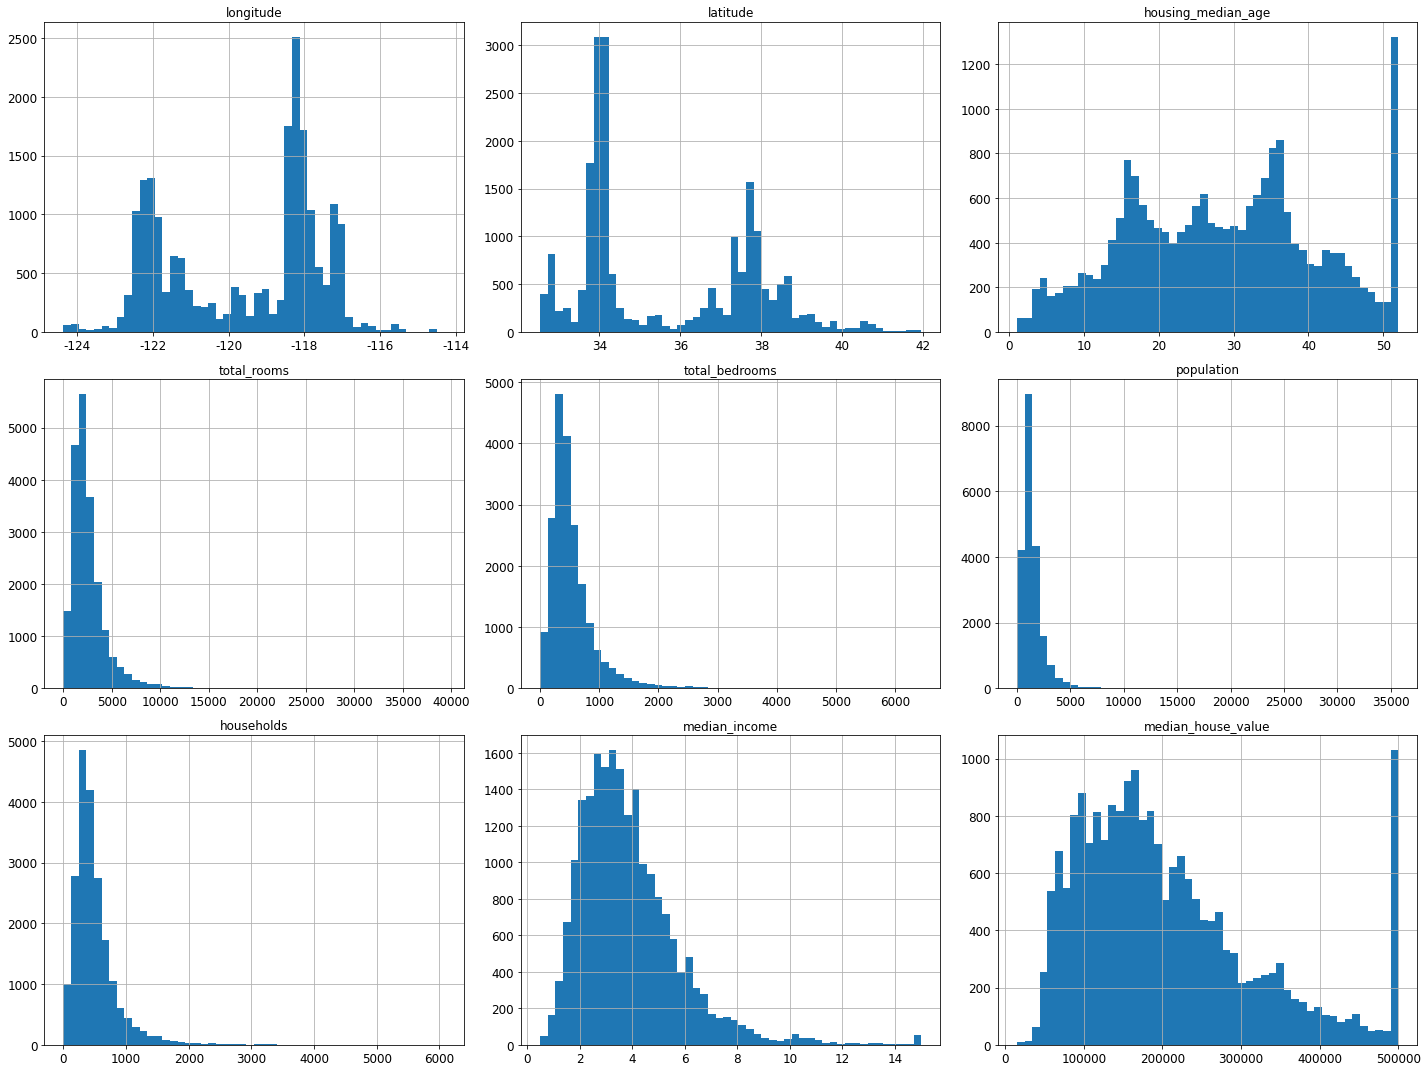

In [41]:
# 다이어그램으로 전체 특성 파악
housing.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

housing_median_age와 median_house_value는 끝값이 엄청 많은걸로 봐선 최대치가 제한되어 있는것으로 보임

In [42]:
np.random.seed(42)

In [44]:
# 사이킷런의 train_test_split() 함수가 있지만 직접 만듬
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]  # no.6

### 체크체크
    - no.6
    
    -- Dataframe에서의 인덱싱

    [] : 위치 정수를 활용한 인덱싱
    .loc[label] : 레이블 기반 인덱싱(정수값이 아닌 레이블!)
    .iloc[position] : 위치 정수를 기반으로 인덱싱
    [:] : 슬라이싱을 활용한 인덱싱
    [bool_vec] : 불리언 벡터를 활용한 인덱싱


[인덱싱 상세한 정보](https://kongdols-room.tistory.com/112)

In [45]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


In [52]:
from zlib import crc32  # 고유 주소 가져와줌

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32  # no.7

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))  # 각각에 함수 적용해서 불리언 벡터를 반환
    return data.loc[~in_test_set], data.loc[in_test_set]

### 체크체크
    - no.7
    -- 함수 분석
    crc32()는 np.in64()형 정수를 받아 0,2**32-1 범위의 랜덤한 정수인 해시를 만들어냄
    0xffffffff는 32비트에서 표현가능한 최대값
    2**32는 16진수에서 위에 값보다 하나 더 큰 값(0x1 0000 0000)
    위 값에 test_ratio를 곱해서 특정 비율 만큼의 정수를 얻는 것.

[자세한건](https://blog.naver.com/cnuchips/221292744766)

In [54]:
housing_with_id = housing.reset_index() # 'index' 열이 추가된 데이터프레임 반환 # set_index()와 비교해볼것(반대 역할이라 하긴함)
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [55]:
# id로 고유값인 위도와 경도를 사용할수도 있음
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [56]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
59,59,-122.29,37.82,2.0,158.0,43.0,94.0,57.0,2.5625,60000.0,NEAR BAY,-122252.18
60,60,-122.29,37.83,52.0,1121.0,211.0,554.0,187.0,3.3929,75700.0,NEAR BAY,-122252.17
61,61,-122.29,37.82,49.0,135.0,29.0,86.0,23.0,6.1183,75000.0,NEAR BAY,-122252.18
62,62,-122.29,37.81,50.0,760.0,190.0,377.0,122.0,0.9011,86100.0,NEAR BAY,-122252.19
67,67,-122.29,37.80,52.0,1027.0,244.0,492.0,147.0,2.6094,81300.0,NEAR BAY,-122252.20


In [57]:
# sklearn 활용한 데이터셋 split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [58]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


계층적 샘플링이 필요함<br/>
train_test_split 함수의 stratify 변수를 활용하면 가능

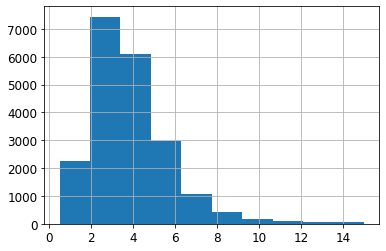

In [59]:
housing["median_income"].hist()
plt.show()

In [60]:
# 소득 카테고리 개수를 제한하기 위해 1.5.로 나눔  # max가 15라 1.5로 나누면 0~10 사이값이 됨
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)  # np.ceil <- 올림함수

# 5 이상은 5로 레이블
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)  # no.8

### 체크체크
    - no.8
    -- .where() 함수
    특정 조건에 맞는 데이터들을 선택하여 출력하는데 사용
    조건식을 입력받아, 조건식에 True에 해당하는 데이터들을 출력
    적용하는 Series나 DataFrame의 형상과 일치하는 데이터를 출력
    inplace=True면 where메서드 적용 시 출력 값으로 원본 배열 교체

[자세한 건](https://kongdols-room.tistory.com/119)

In [62]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

그림 저장: income_category_hist


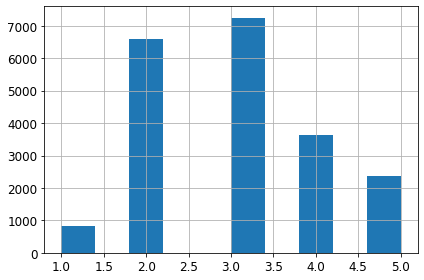

In [63]:
housing["income_cat"].hist()
save_fig('income_category_hist')

In [64]:
# 소득 카테고리 기반으로 계층 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]): # 인덱스 반환 # get_n_split함수도 있음
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[train_index]

In [66]:
# iloc를 활용해도 똑같음
sss = housing.iloc[train_index]
sss.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


In [67]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2.0
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5.0
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2.0
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2.0
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3.0


In [68]:
# 테스트 세트에서 소득 카테고리의 비율 확인
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350594
2.0    0.318859
4.0    0.176296
5.0    0.114402
1.0    0.039850
Name: income_cat, dtype: float64

In [69]:
# 전체 데이터셋의 소득 카테고리 비율 확인
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

train_test_split에서 stratify 변수 사용한것도 함께 비교해봤음

In [72]:
# 비교 그래프
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

train_set2, test_set2 = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
    "Stratified by tts": income_cat_proportions(test_set2),
}).sort_index()  # 인덱스 기준 정렬. 기본값은 오름차순. sort_values() 함수도 있음

compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100
compare_props["StratbyTts. %error"] = 100 * compare_props["Stratified by tts"] / compare_props["Overall"] - 100

In [74]:
display(compare_props)

,Overall,Stratified,Random,Stratified by tts,Rand. %error,Strat. %error,StratbyTts. %error
1.0,0.039826,0.039850,0.040213,0.039729,0.973236,0.060827,-0.243309
2.0,0.318847,0.318859,0.324370,0.318798,1.732260,0.003799,-0.015195
3.0,0.350581,0.350594,0.358527,0.350533,2.266446,0.003455,-0.013820
4.0,0.176308,0.176296,0.167393,0.176357,-5.056334,-0.006870,0.027480
5.0,0.114438,0.114402,0.109496,0.114583,-4.318374,-0.031753,0.127011


In [ ]:
# 데이터 복구
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

### inplace 옵션
판다스에서 inplace는 기본값이 False임.<br/>
True이면 변환한 값으로 dataframe을 아예 바꿈(깊은 복사 느낌)<br/>
False 값 사용하는게 실수 줄이는데는 좋음

# 데이터 이해를 위한 탐색과 시각화